In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Slope = 0.0498


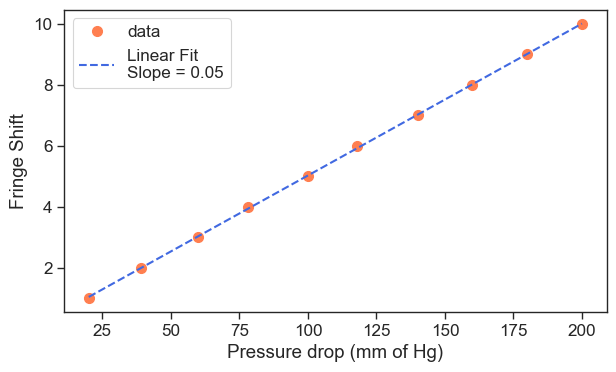

In [21]:
p = [220,201, 180, 162, 140, 122, 100, 80,60,40]
p_i = 240

dP = p_i - np.array(p)
F = [1,2,3,4,5,6,7,8,9,10]

# make a liner fit of the data
m, b = np.polyfit(dP, F, 1)
sns.set_style('ticks')
sns.set_context('paper', rc={'lines.linewidth': 1.5}, font_scale=1.4)


plt.figure(figsize=(7,4), dpi=100)
plt.plot(dP, F, 'o',color='coral',ms=7, label='data')
plt.plot(dP, m*dP + b,ls='--',color='royalblue', label='Linear Fit\nSlope = {:.2f}'.format(m))

plt.xlabel('Pressure drop (mm of Hg)')
plt.ylabel('Fringe Shift')
plt.legend()

plt.savefig('P_vs_F.pdf', dpi=400, bbox_inches='tight')


print('Slope = {:.4f}'.format(m))

In [3]:
print(dP)

[ 20  39  60  78 100 118 140 160 180 200]


In [4]:
def f(x,a,b):
    return a*x + b

from scipy.optimize import curve_fit
popt, pcov = curve_fit(f, dP*133.322, F)
print('Slope = {:.4f}'.format(popt[0]))
print('Intercept = {:.4f}'.format(popt[1]))

print('Error in Slope = {:.10f}'.format(np.sqrt(pcov[0,0])))



Slope = 0.0004
Intercept = 0.0442
Error in Slope = 0.0000017953


In [5]:
# convert the slope in terms of pascals
print('Slope = {:.8f} Fringe Shift/Pa'.format(popt[0]))

Slope = 0.00037372 Fringe Shift/Pa


In [6]:
L = 650*1e-9 # wavelenght of light
d = 0.079
P = 1.01325*1e5 # atmospheric pressure
dm = popt[0] # slope in terms of fringe shift per pascal

n_f = 1 + (dm*P*L)/d
print('n_f = {:.5f}'.format(n_f))

n_f = 1.00031


In [7]:
# estimate the error in n_f
# error in dm
ed = 0.001
edm=np.sqrt(pcov[0,0])

dn_f = (edm/dm) + (ed/d)
print('Error in n_f = {:.5f}'.format(dn_f))

Error in n_f = 0.01746


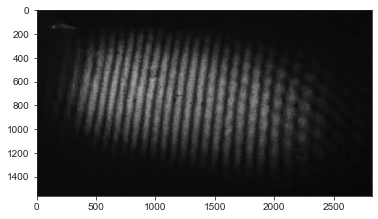

In [8]:
# load the image F2.jpg
import cv2 as cv

img = cv.imread('F2.jpg')
# convert to grayscale
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')

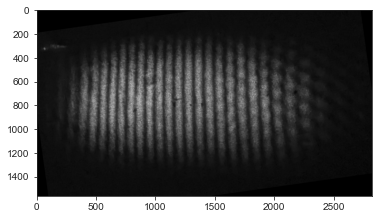

In [9]:
# rotate the image by 10 degress counter clockwise
M = cv.getRotationMatrix2D((gray.shape[1]/2, gray.shape[0]/2), 8, 1)
rotated = cv.warpAffine(gray, M, (gray.shape[1], gray.shape[0]))
rotated_color = cv.warpAffine(img, M, (gray.shape[1], gray.shape[0]))
plt.imshow(rotated, cmap='gray')

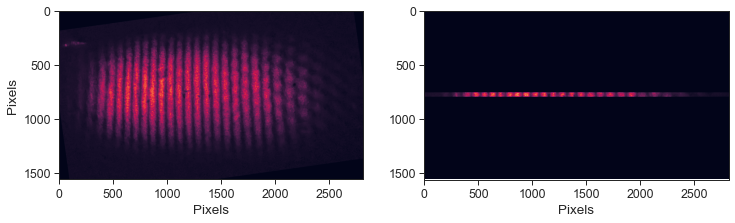

In [63]:
# get the shape of the rotated image
rows, cols = rotated.shape

# take a rectangula slice of the image
mask = np.zeros_like(rotated)
mask[int(rows/2)-20:int(rows/2)+20, :] = 255

masked_image = cv.bitwise_and(rotated, mask)
fig, ax = plt.subplots(1,2, figsize=(12,6))
ax[0].imshow(rotated)
ax[1].imshow(masked_image)

ax[0].set_ylabel('Pixels')
ax[0].set_xlabel('Pixels')
ax[1].set_xlabel('Pixels')
plt.savefig('F2_masked.pdf', dpi=400, bbox_inches='tight')

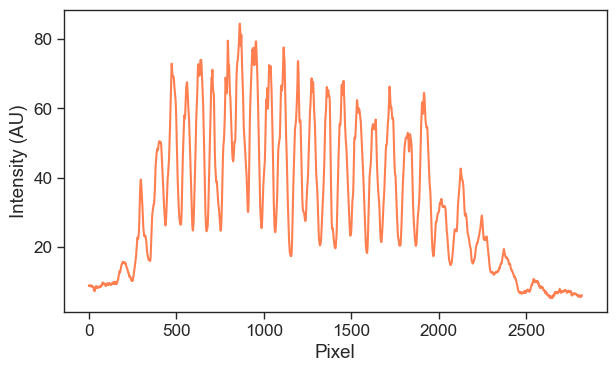

In [50]:
# get the intensity profile from the masked region
intensity = rotated[int(rows/2)-20:int(rows/2)+20, :].mean(axis=0)

plt.figure(figsize=(7,4), dpi=100)
plt.plot(intensity, color='coral')

plt.xlabel('Pixel')
plt.ylabel('Intensity (AU)')

plt.savefig('Intensity_profile.pdf', dpi=400, bbox_inches='tight')

In [31]:
print(intensity.max())

84.5


In [64]:
# calculate fringe visibility
intensity1 = intensity[1000:1600]
print(intensity1.max())
print(intensity1.min())

V = (intensity1.max() - intensity1.min())/(intensity1.max() + intensity1.min())
# calculate fringe contrast
C = (intensity1.max() - intensity1.min())/(intensity1.max())
print('Fringe Visibility = {:.2f}'.format(V))
print('Fringe Contrast = {:.2f}'.format(C))

77.625
17.325
Fringe Visibility = 0.64
Fringe Contrast = 0.78


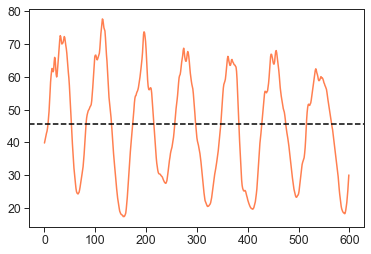

In [48]:
plt.plot(intensity1, color='coral')
plt.axhline(y=intensity1.mean(), color='k', ls='--')